In [7]:
import tcod.map
import numpy as np
import matplotlib.pyplot as plt 
import random

In [8]:
class Rect:
    def __init__(self, x, y, w, h):
        self.x1 = x
        self.y1 = y
        self.x2 = x + w
        self.y2 = y + h
    
    def __repr__(self):
        return f'Rect(x={self.x1}, y={self.y1}, w={self.x2-self.x1}, h={self.y2-self.y1})'
    
    def center(self):
        center_x = int((self.x1 + self.x2) / 2)
        center_y = int((self.y1 + self.y2) / 2)
        return center_x, center_y

    def intersect(self, other):
        return (
            self.x1 <= other.x2 and
            self.x2 >= other.x1 and
            self.y1 <= other.y2 and
            self.y2 >= other.y1
        )


def create_room(game_map, rect):
    game_map.walkable[rect.y1+1:rect.y2, rect.x1+1:rect.x2] = True
    game_map.transparent[rect.y1+1:rect.y2, rect.x1+1:rect.x2] = True


def create_h_tunnel(game_map, x1, x2, y):
    game_map.walkable[y, min(x1, x2):max(x1, x2) + 1] = True
    game_map.transparent[y, min(x1, x2):max(x1, x2) + 1] = True


def create_v_tunnel(game_map, y1, y2, x):
    for y in range(min(y1, y2), max(y1, y2) + 1):
        game_map.walkable[min(y1, y2):max(y1, y2) + 1, x] = True
        game_map.transparent[min(y1, y2):max(y1, y2) + 1, x] = True

In [9]:
class Level:
    def __init__(self, max_rooms, room_min_size, room_max_size, map_width, map_height):
        self.m = tcod.map.Map(width=80, height=45)
        self.max_rooms = max_rooms
        self.room_min_size = room_min_size
        self.room_max_size = room_max_size
        self.map_width = map_width
        self.map_height = map_height
        self.rooms = []
    
    def _gen_room(self):
        while True:
            w = random.randint(self.room_min_size, self.room_max_size)
            h = random.randint(self.room_min_size, self.room_max_size)
            x = random.randint(1, self.map_width - w - 1)
            y = random.randint(1, self.map_height - h - 1)

            room = Rect(x, y, w, h)
            #return room
            for r in self.rooms:
                if room.intersect(r):
                    break
            else:
                self.rooms.append(room)
                break
            
        create_room(self.m, room)

    def _gen_corridor(self):
        new_x, new_y = self.rooms[-1].center()
        prev_x, prev_y = self.rooms[-2].center()
        if random.random() > 0.5:
            create_h_tunnel(self.m, prev_x, new_x, prev_y)
            create_v_tunnel(self.m, prev_y, new_y, new_x)
        else:
            create_v_tunnel(self.m, prev_y, new_y, prev_x)
            create_h_tunnel(self.m, prev_x, new_x, new_y)
        
    def make_map(self):
        for r in range(self.max_rooms):
            self._gen_room()
            if len(self.rooms) > 1:
                self._gen_corridor()
            


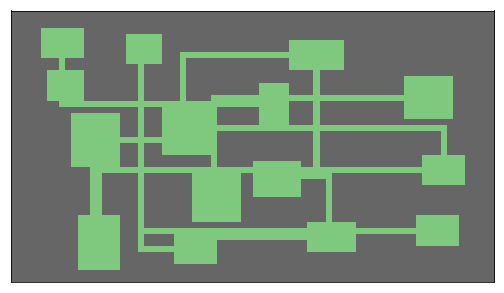

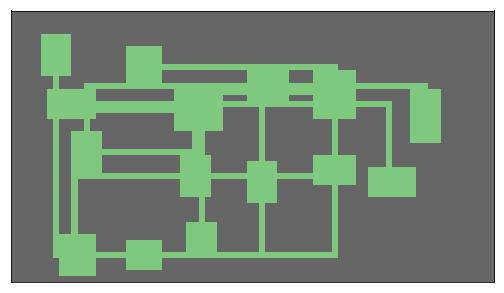

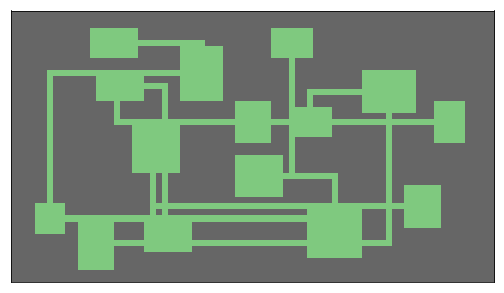

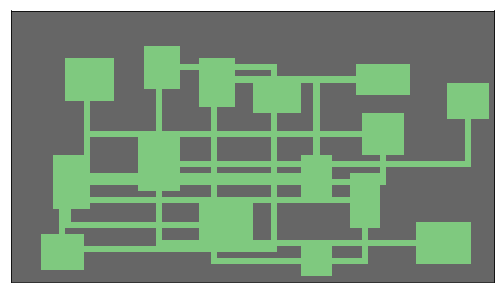

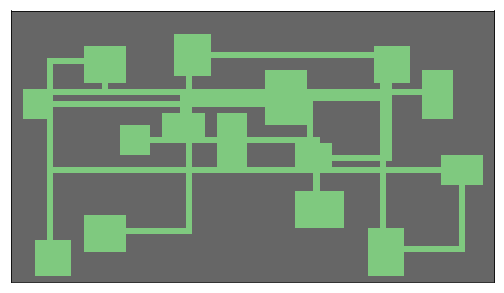

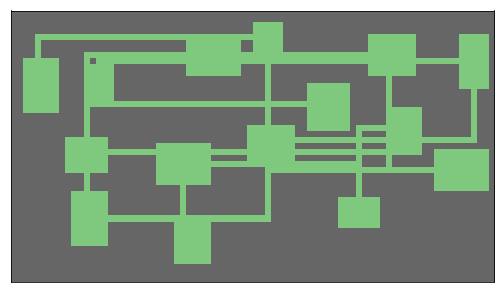

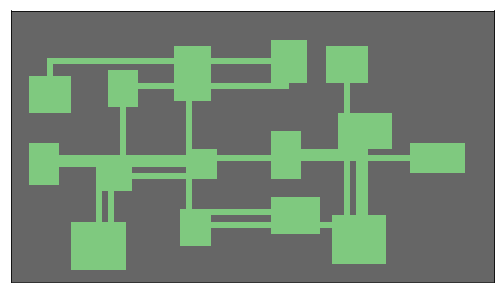

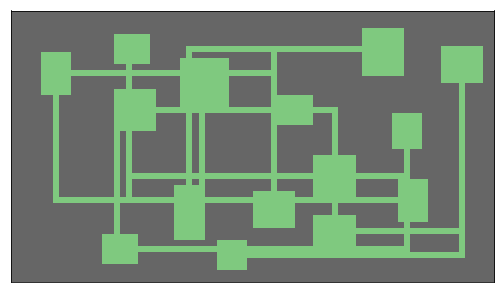

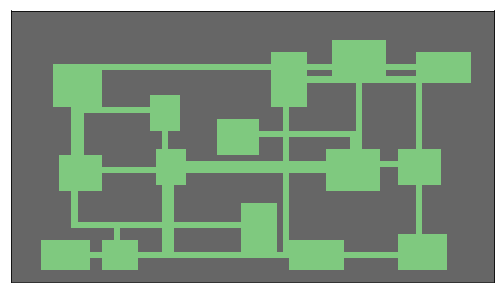

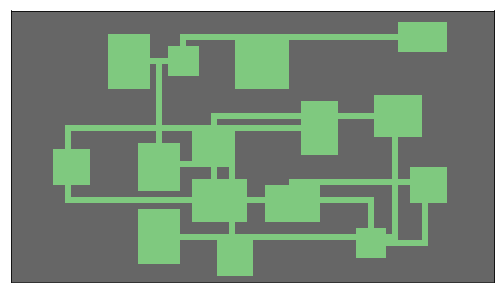

In [30]:
def show_map(level):
    plt.figure(figsize=(10,5))
    plt.imshow(
        level.m.walkable,
        cmap=plt.cm.Accent_r,
        interpolation='nearest'
    )
    plt.xticks([]),plt.yticks([])
    plt.show()
    

for _ in range(10):
    lvl = Level(15, 6, 10, 80, 45)
    lvl.make_map()
    show_map(lvl)